In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.path.append('../dataloader/')

from dataloader import DataLoader 
import keras 

2022-10-13 10:52:11.985323: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/lhv14/.mujoco/mujoco210/bin
2022-10-13 10:52:11.985348: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [12]:
comp = pd.read_csv('../evaluation/comp_hits.csv')
quality = pd.read_csv('../evaluation/comp_hits_qualities.csv')
dl = DataLoader() 
hits, allowed_pids = dl.load_data_trackml(0)

../dataloader/dataloader.py:154: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.hits[['next_mod_id', 'connecting_layer_id']] = self.hits.groupby('particle_id')['discrete_module_id', 'unique_layer_id'].shift(-1)


In [13]:
allowed_pids

array([4.50387451e+15, 4.50394322e+15, 4.50401196e+15, 4.50442426e+15,
       4.50449298e+15])

In [14]:
merged = comp.join(quality,  lsuffix='_1', rsuffix='_2')

In [15]:
merged = merged.dropna()

In [16]:
hits[['z_2', 'r_2']] = hits.groupby('particle_id')[['z', 'r']].shift(-1).dropna()

In [17]:
double_merge = hits.merge(merged.rename({'hit2_z_1': 'z', 'hit2_r_1' :'r'}, axis='columns'))

In [18]:
agree = double_merge[(double_merge['z_2'] ==double_merge['comp_hit_z_1']) & (double_merge['r_2'] == double_merge['comp_hit_r_1'])]

In [20]:
len(agree)/(len(double_merge)/10)

0.11607142857142858

In [10]:
double_merge

,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,...,r_2,m,b,comp_hit_z_1,comp_hit_r_1,hit2_z_2,hit2_r_2,comp_hit_z_2,comp_hit_r_2,quality
0,21691,-3.90484,5.94607,-8.294820,7.113616,4,8,187,2.151874,4504492980568064,...,7.325927,-0.9265309486149609,-0.5717917745445513,-13.053500,11.527289,-24.4800,17.216434,-36.180000,26.006573,-0.124900
1,21691,-3.90484,5.94607,-8.294820,7.113616,4,8,187,2.151874,4504492980568064,...,7.325927,-0.9265309486149609,-0.5717917745445513,-13.371000,11.701634,-24.4800,17.216434,-36.060001,26.172882,-0.124809
2,21691,-3.90484,5.94607,-8.294820,7.113616,4,8,187,2.151874,4504492980568064,...,7.325927,-0.9265309486149609,-0.5717917745445513,-12.838901,11.616380,-24.4800,17.216434,-35.840000,25.712322,-0.123810
3,21691,-3.90484,5.94607,-8.294820,7.113616,4,8,187,2.151874,4504492980568064,...,7.325927,-0.9265309486149609,-0.5717917745445513,-12.585800,11.510404,-24.4800,17.216434,-36.939999,26.550806,-0.127216
4,21691,-3.90484,5.94607,-8.294820,7.113616,4,8,187,2.151874,4504492980568064,...,7.325927,-0.9265309486149609,-0.5717917745445513,-13.393300,11.597387,-24.4800,17.216434,-35.279999,25.682438,-0.122506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137911,83848,-45.03830,-69.09790,-37.420002,82.480110,2,17,739,-2.148439,653029573830639616,...,101.935417,"tf.Tensor(-0.7456379576248204, shape=(), dtype...","tf.Tensor(54.57833631505705, shape=(), dtype=f...",-58.020000,101.919334,10.0987,17.136835,15.180000,26.280981,-1.682021
137912,83848,-45.03830,-69.09790,-37.420002,82.480110,2,17,739,-2.148439,653029573830639616,...,101.935417,"tf.Tensor(-0.7456379576248204, shape=(), dtype...","tf.Tensor(54.57833631505705, shape=(), dtype=f...",-67.240005,101.787689,10.0987,17.136835,14.920000,26.014709,-1.648695
137913,83848,-45.03830,-69.09790,-37.420002,82.480110,2,17,739,-2.148439,653029573830639616,...,101.935417,"tf.Tensor(-0.7456379576248204, shape=(), dtype...","tf.Tensor(54.57833631505705, shape=(), dtype=f...",-65.580002,102.226112,10.0987,17.136835,15.039999,25.611507,-1.618434
137914,83848,-45.03830,-69.09790,-37.420002,82.480110,2,17,739,-2.148439,653029573830639616,...,101.935417,"tf.Tensor(-0.7456379576248204, shape=(), dtype...","tf.Tensor(54.57833631505705, shape=(), dtype=f...",-69.400002,102.172264,21.0800,35.878181,29.279999,49.725708,-5.056952


In [204]:
quality.hit2_r.value_counts()

7.303267     495
5.258880     429
5.224966     429
6.111474     374
7.320758     374
            ... 
10.098383     11
3.996767      11
7.180122      11
7.136373      11
3.950813      11
Name: hit2_r, Length: 1237, dtype: int64

In [149]:
merged.iloc[:11]

,particle_id,hit2_z_1,hit2_r_1,m,b,comp_hit_z_1,comp_hit_r_1,hit2_z_2,hit2_r_2,comp_hit_z_2,comp_hit_r_2,quality
0,7.881319e+17,-60.250000,7.002734,-0.11618763436935205,0.0024287366745179284,-70.250000,8.165700,-60.250000,7.002734,-70.250000,8.165700,-0.002823
1,7.881319e+17,-60.250000,7.002734,-0.11618763436935205,0.0024287366745179284,-110.199997,12.805676,-60.250000,7.002734,-110.199997,12.805676,0.015146
2,7.881319e+17,-60.250000,7.002734,-0.11618763436935205,0.0024287366745179284,-82.250000,9.557798,-60.250000,7.002734,-82.250000,9.557798,0.003022
3,7.881319e+17,-60.250000,7.002734,-0.11618763436935205,0.0024287366745179284,-130.199997,15.135748,-60.250000,7.002734,-130.199997,15.135748,0.023392
4,7.881319e+17,-60.250000,7.002734,-0.11618763436935205,0.0024287366745179284,-254.550003,29.580128,-60.250000,7.002734,-254.550003,29.580128,0.075206
5,7.881319e+17,-60.250000,7.002734,-0.11618763436935205,0.0024287366745179284,-69.750000,8.110636,-60.250000,7.002734,-69.750000,8.110636,-0.003078
6,7.881319e+17,-60.250000,7.002734,-0.11618763436935205,0.0024287366745179284,-96.199997,11.173598,-60.250000,7.002734,-96.199997,11.173598,0.009157
7,7.881319e+17,-60.250000,7.002734,-0.11618763436935205,0.0024287366745179284,-81.750000,9.514124,-60.250000,7.002734,-81.750000,9.514124,0.002787
8,7.881319e+17,-60.250000,7.002734,-0.11618763436935205,0.0024287366745179284,-150.199997,17.443451,-60.250000,7.002734,-150.199997,17.443451,0.031653
9,7.881319e+17,-60.250000,7.002734,-0.11618763436935205,0.0024287366745179284,-214.550003,24.944431,-60.250000,7.002734,-214.550003,24.944431,0.058184


In [13]:
merged.describe()

,particle_id,hit2_z_1,hit2_r_1,comp_hit_z_1,comp_hit_r_1,hit2_z_2,hit2_r_2,comp_hit_z_2,comp_hit_r_2,quality
count,1.932920e+05,193292.000000,193292.000000,193292.000000,193292.000000,193292.000000,193292.000000,193292.000000,193292.000000,193292.000000
mean,4.200923e+17,43.761062,14.189856,61.778142,30.492571,43.761062,14.189856,61.778142,30.492571,-2.722224
std,2.129220e+17,45.853546,14.783791,76.109317,28.251517,45.853546,14.783791,76.109317,28.251517,3.846493
min,4.505180e+15,-69.800003,3.317971,-295.549988,4.851836,-69.800003,3.317971,-295.549988,4.851836,-21.993180
25%,3.107503e+17,13.914301,6.523355,20.900000,7.572295,13.914301,6.523355,20.900000,7.572295,-3.150656
50%,4.368531e+17,27.000000,11.554938,69.800003,17.190012,27.000000,11.554938,69.800003,17.190012,-1.318088
75%,5.899779e+17,81.750000,17.149580,129.750000,49.913956,81.750000,17.149580,129.750000,49.913956,-0.541968
max,8.151527e+17,109.750000,102.387398,295.549988,102.534622,109.750000,102.387398,295.549988,102.534622,0.014721


In [9]:
merged.iloc[:10].comp_hit_r_2.values

array([11.54135323, 11.72531605, 49.56609344, 11.66087723, 26.49073219,
       26.52404785, 26.47735214, 26.47519302, 26.56677818, 26.45342445])

In [10]:
first = merged[merged['hit2_z_1']==-24.399999618530277].dropna()

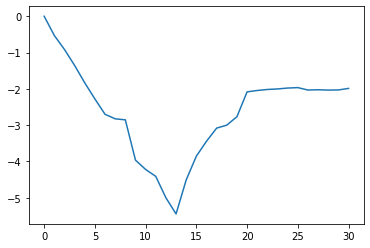

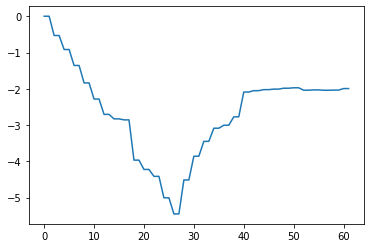

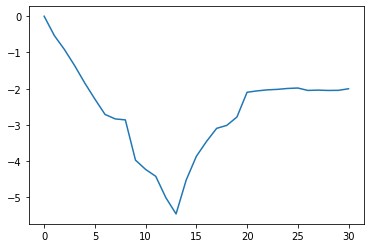

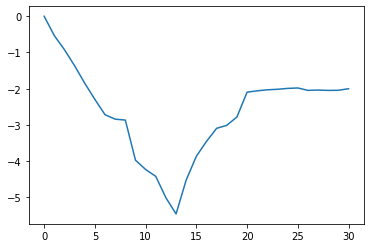

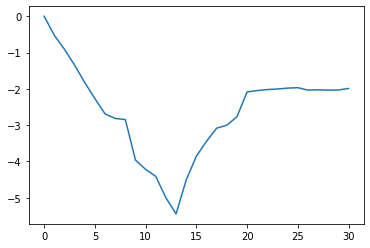

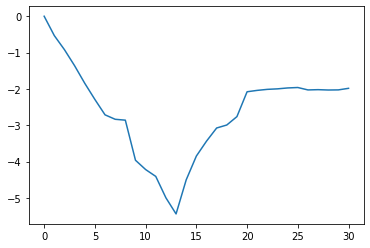

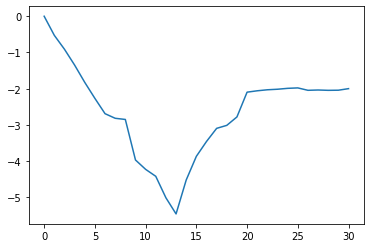

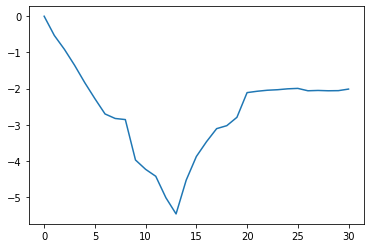

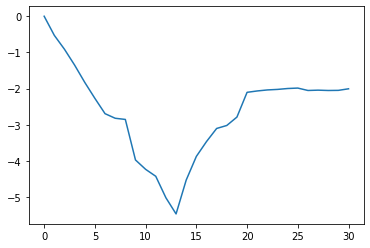

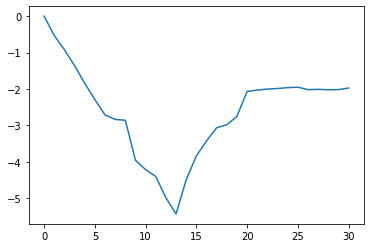

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


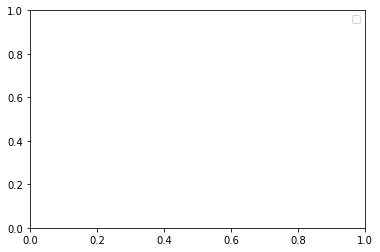

In [21]:

#'comp_rs = np.unique(first.comp_hit_r_2)
#comp_rs = merged.iloc[:10].comp_hit_r_2.values
#for i in comp_rs: 
j = 0
for i in range(j, j+10): 
    hit2_r = merged.iloc[j].hit2_r_2
    comp_r = merged.iloc[i].comp_hit_r_1
    ex = merged[(merged['hit2_r_2']==hit2_r) & (merged['comp_hit_r_2']==comp_r)]
    #print(ex)
    plt.plot(range(len(ex)), ex.quality, label="yes")
    #print(comp_r)
    plt.show()
plt.legend()


In [22]:
hits[hits['particle_id']==416]

,,run,lumi,evt,nhit,hit_n,hit_id,x,y,z,particle_id,...,sim_pt,sim_eta,sim_phi,volume_id,layer_id,module_id,r,unique_layer_ids,unique_layer_id,discrete_module_id
entry,subentry,,,,,,,,,,,,,,,,,,,,,


In [69]:
ex = merged[merged['hit2_r_2']==4.991849422454834]

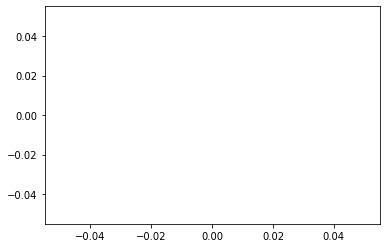

In [70]:
plt.plot(range(len(ex)), ex.quality)

In [26]:
p = hits[hits['particle_id']==-20750.0]

In [37]:
p.append(p)

run  lumi   evt    nhit   hit_n  hit_id         x         y  \
entry subentry                                                                
0     46641       1    52  5102  286493  286493   44677  1.316711 -3.308324   
      46565       1    52  5102  286493  286493   44601  1.320554 -3.319735   
      50799       1    52  5102  286493  286493   48878  1.661175 -4.144069   
      59007       1    52  5102  286493  286493   57149  2.405114 -5.907001   
      63241       1    52  5102  286493  286493   61412  2.778896 -6.772751   
      63225       1    52  5102  286493  286493   61396  2.788306 -6.793437   
      67757       1    52  5102  286493  286493   65954  3.212962 -7.765092   
      46641       1    52  5102  286493  286493   44677  1.316711 -3.308324   
      46565       1    52  5102  286493  286493   44601  1.320554 -3.319735   
      50799       1    52  5102  286493  286493   48878  1.661175 -4.144069   
      59007       1    52  5102  286493  286493   57149  2.405114 -5.907001   
      63241       1    52  5102  286493  286493   61412  2.778896 -6.772751   
      63225       1    52  5102  286493  286493   61396  2.788306 -6.793437   
      67757       1    52  5102  286493  286493   65954  3.212962 -7.765092   

                         z  particle_id  ...    sim_pt   sim_eta   sim_phi  \
entry subentry                           ...                                 
0     46641    -109.656998       -20750  ...  2.138403 -4.146584 -1.200927   
      46565    -110.056999       -20750  ...  2.138403 -4.146584 -1.200927   
      50799    -140.199997       -20750  ...  2.138403 -4.146584 -1.200927   
      59007    -200.358994       -20750  ...  2.138403 -4.146584 -1.200927   
      63241    -230.169006       -20750  ...  2.138403 -4.146584 -1.200927   
      63225    -230.968994       -20750  ...  2.138403 -4.146584 -1.200927   
      67757    -264.399994       -20750  ...  2.138403 -4.146584 -1.200927   
      46641    -109.656998       -20750  ...  2.138403 -4.146584 -1.200927   
      46565    -110.056999       -20750  ...  2.138403 -4.146584 -1.200927   
      50799    -140.199997       -20750  ...  2.138403 -4.146584 -1.200927   
      59007    -200.358994       -20750  ...  2.138403 -4.146584 -1.200927   
      63241    -230.169006       -20750  ...  2.138403 -4.146584 -1.200927   
      63225    -230.968994       -20750  ...  2.138403 -4.146584 -1.200927   
      67757    -264.399994       -20750  ...  2.138403 -4.146584 -1.200927   

                volume_id  layer_id  module_id         r  unique_layer_ids  \
entry subentry                                                               
0     46641             1         7         17  3.560721                11   
      46565             1         7         16  3.572744                11   
      50799             1         8         17  4.464617                12   
      59007             1        10         17  6.377870                14   
      63241             1        11         17  7.320684                15   
      63225             1        11         16  7.343394                15   
      67757             1        12         17  8.403558                16   
      46641             1         7         17  3.560721                11   
      46565             1         7         16  3.572744                11   
      50799             1         8         17  4.464617                12   
      59007             1        10         17  6.377870                14   
      63241             1        11         17  7.320684                15   
      63225             1        11         16  7.343394                15   
      67757             1        12         17  8.403558                16   

                unique_layer_id  discrete_module_id  
entry subentry                                       
0     46641                  11               11117  
      46565                  11               11116  
      50799                  12      

In [16]:
trues = []
falses = [] 

for i in range(2, len(p)-1): 
    row = p.iloc[i]
    print(row.r)
    m_one_hit = merged[merged['hit2_r_2']==row.r]
    print(m_one_hit)
    next_true_hit = p.iloc[i+1]
    true = len(m_one_hit[m_one_hit['comp_hit_r_2']==next_true_hit.r]) 
    false = len(m_one_hit) - true 
    trues.append(true)
    falses.append(false)

NameError: name 'p' is not defined

In [34]:
trues

[0, 0, 0, 0]

In [35]:
falses

[1650, 0, 0, 0]

In [126]:
quality

,hit2_z,hit2_r,comp_hit_z,comp_hit_r,quality
0,-31.775999,5.468029,-32.576000,5.635563,0.062193
1,-31.775999,5.468029,-40.699001,7.327832,0.076291
2,-31.775999,5.468029,-32.175999,5.560024,0.061495
3,-31.775999,5.468029,-41.098999,7.426084,0.076966
4,-31.775999,5.468029,-32.175999,5.541021,0.061493
...,...,...,...,...,...
148633,-52.910999,9.950032,-66.307999,12.780613,-15.985365
148634,-52.910999,9.950032,-66.307999,12.774048,-15.985574
148635,-52.910999,9.950032,-66.307999,12.772175,-15.985631
148636,-52.910999,9.950032,-66.307999,12.780315,-15.985377


In [17]:
for pid in merged.particle_id: 
    p = merged[merged['particle_id']==pid]
    

,particle_id,hit2_z_1,hit2_r_1,m,b,comp_hit_z_1,comp_hit_r_1,hit2_z_2,hit2_r_2,comp_hit_z_2,comp_hit_r_2,quality
0,4.368531e+17,4.92568,7.135254,1.4645362723123903,-0.07858335464466126,8.753930,11.541353,4.92568,7.135254,8.753930,11.541353,0.001274
1,4.368531e+17,4.92568,7.135254,1.4645362723123903,-0.07858335464466126,8.286460,11.725316,4.92568,7.135254,8.286460,11.725316,0.001312
2,4.368531e+17,4.92568,7.135254,1.4645362723123903,-0.07858335464466126,32.760002,49.566093,4.92568,7.135254,32.760002,49.566093,0.005472
3,4.368531e+17,4.92568,7.135254,1.4645362723123903,-0.07858335464466126,9.128650,11.660877,4.92568,7.135254,9.128650,11.660877,0.001277
4,4.368531e+17,4.92568,7.135254,1.4645362723123903,-0.07858335464466126,17.150000,26.490732,4.92568,7.135254,17.150000,26.490732,0.002926
...,...,...,...,...,...,...,...,...,...,...,...,...
193287,5.179289e+17,109.75000,6.554595,"tf.Tensor(0.00017554419381277903, shape=(), dt...","tf.Tensor(6.535328541483198, shape=(), dtype=f...",150.199997,11.794086,109.75000,6.554595,150.199997,11.794086,-5.349674
193288,5.179289e+17,109.75000,6.554595,"tf.Tensor(0.00017554419381277903, shape=(), dt...","tf.Tensor(6.535328541483198, shape=(), dtype=f...",129.800003,11.796741,109.75000,6.554595,129.800003,11.796741,-4.748296
193289,5.179289e+17,109.75000,6.554595,"tf.Tensor(0.00017554419381277903, shape=(), dt...","tf.Tensor(6.535328541483198, shape=(), dtype=f...",149.800003,11.799599,109.75000,6.554595,149.800003,11.799599,-5.337931
193290,5.179289e+17,109.75000,6.554595,"tf.Tensor(0.00017554419381277903, shape=(), dt...","tf.Tensor(6.535328541483198, shape=(), dtype=f...",150.199997,11.804876,109.75000,6.554595,150.199997,11.804876,-5.349753


In [25]:
merged[merged['particle_id']==4.3685308086511206e+17]

,particle_id,hit2_z_1,hit2_r_1,m,b,comp_hit_z_1,comp_hit_r_1,hit2_z_2,hit2_r_2,comp_hit_z_2,comp_hit_r_2,quality
0,4.368531e+17,4.92568,7.135254,1.4645362723123903,-0.07858335464466126,8.753930,11.541353,4.92568,7.135254,8.753930,11.541353,0.001274
1,4.368531e+17,4.92568,7.135254,1.4645362723123903,-0.07858335464466126,8.286460,11.725316,4.92568,7.135254,8.286460,11.725316,0.001312
2,4.368531e+17,4.92568,7.135254,1.4645362723123903,-0.07858335464466126,32.760002,49.566093,4.92568,7.135254,32.760002,49.566093,0.005472
3,4.368531e+17,4.92568,7.135254,1.4645362723123903,-0.07858335464466126,9.128650,11.660877,4.92568,7.135254,9.128650,11.660877,0.001277
4,4.368531e+17,4.92568,7.135254,1.4645362723123903,-0.07858335464466126,17.150000,26.490732,4.92568,7.135254,17.150000,26.490732,0.002926
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.368531e+17,4.92568,7.135254,1.4645362723123903,-0.07858335464466126,5.732030,11.557475,4.92568,7.135254,5.732030,11.557475,0.001349
996,4.368531e+17,4.92568,7.135254,1.4645362723123903,-0.07858335464466126,15.800000,26.312290,4.92568,7.135254,15.800000,26.312290,0.002942
997,4.368531e+17,4.92568,7.135254,1.4645362723123903,-0.07858335464466126,22.580000,36.239403,4.92568,7.135254,22.580000,36.239403,0.004029
998,4.368531e+17,4.92568,7.135254,1.4645362723123903,-0.07858335464466126,10.299500,11.761606,4.92568,7.135254,10.299500,11.761606,0.001251


In [26]:
hits[hits['particle_id']==4.3685308086511206e+17]

,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,pt,nhits,q,discrete_module_id,Unnamed: 0,unique_layer_id,z_2,diff_z
4058,17266,3.102010,-0.831924,2.246590,3.211629,2,8,120,-0.262023,436853080865112064,0.737587,12,-1,875,0,1.0,4.925680,2.679090
19733,23115,6.918780,-1.744230,4.925680,7.135254,4,8,239,-0.246955,436853080865112064,0.737587,12,-1,1218,1,2.0,7.939400,3.013720
31055,28951,11.234100,-2.630160,7.939400,11.537884,6,8,440,-0.229981,436853080865112064,0.737587,12,-1,1867,2,3.0,8.062710,0.123310
34673,28969,11.411200,-2.663000,8.062710,11.717810,6,8,441,-0.229264,436853080865112064,0.737587,12,-1,1868,2,3.0,11.854900,3.792191
42674,33749,16.871000,-3.541350,11.854900,17.238672,8,8,661,-0.206904,436853080865112064,0.737587,12,-1,2816,3,4.0,18.230000,6.375099
49510,57601,26.098099,-4.452540,18.230000,26.475193,2,13,499,-0.168981,436853080865112064,0.737587,12,-1,5522,7,5.0,25.100000,6.870001
56618,62812,36.109001,-4.629760,25.100000,36.404594,4,13,699,-0.127520,436853080865112064,0.737587,12,-1,6562,8,6.0,34.349998,9.249998
60307,68110,49.507500,-3.575450,34.349998,49.636444,6,13,1053,-0.072095,436853080865112064,0.737587,12,-1,8092,9,7.0,45.820000,11.470001
67021,73079,65.836700,-0.317097,45.820000,65.837463,8,13,1480,-0.004816,436853080865112064,0.737587,12,-1,10157,10,8.0,46.299999,0.480000
69016,73078,66.464798,-0.143485,46.299999,66.464951,8,13,1479,-0.002159,436853080865112064,0.737587,12,-1,10156,10,8.0,58.020000,11.720001


In [143]:
agree = double_merge[(double_merge['z_2'] ==double_merge['comp_hit_z_1']) & (double_merge['r_2'] == double_merge['comp_hit_r_1'])]
agree['is_true'] = np.ones(len(agree))

/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
disagree = double_merge[(double_merge['z_2'] !=double_merge['comp_hit_z_1']) | (double_merge['r_2'] != double_merge['comp_hit_r_1'])]
disagree['is_true'] = np.zeros(len(disagree))

/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
from sklearn.model_selection import train_test_split 

from keras.models import Sequential
from keras.layers import Dense 

2022-10-10 14:48:11.265311: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/lhv14/.mujoco/mujoco210/bin
2022-10-10 14:48:11.265333: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [109]:

prepped = pd.concat([disagree,agree], axis=0)
#necessary because of replay 
predded = prepped.drop_duplicates() 
x_train, x_test, y_train, y_test = train_test_split(prepped[['r', 'z', 'comp_hit_z_1', 'comp_hit_r_1']], prepped['is_true'].values, train_size=0.7)

In [2]:
#I'm now going to define my neural net in a sequence of layers 
model = Sequential()
#our first layer! 20  is the number of neurons
model.add(Dense(100, input_dim=4, activation='relu'))
#input dimension is only specifiede in first layer
#for most cases, unless it's an output layer, relu is good 
#model.add(Dense(15, activation='relu'))
#in Keras in a regression, the number of neurons in the output layer is always 1
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

NameError: name 'Sequential' is not defined

In [3]:
#for a rgression, rmsprop is usually quite good 
#optimizer = keras.optimizers.rmsprop(learning_rate=0.001)
model.compile(loss='binary_crossentropy',metrics=['accuracy'], )
#epochs is how many times is all of the data going to go through the neural net
#batch_size is how many rows of the data to consider at any one time - but all of the data 
#will be used in one epoch 

#batch_size is usually set in powers of two 
model.fit(x_train, y_train, epochs=100, batch_size=128)

NameError: name 'model' is not defined

In [118]:
from sklearn.metrics import accuracy_score

preds = model.predict(x_test)

accuracy_test = accuracy_score(y_test, np.round(preds))

preds_train = model.predict(x_train)
accuracy_train = accuracy_score(y_train, np.round(preds_train))

print('test :', accuracy_test, 'train: ', accuracy_train)

test : 0.97319515081726 train:  0.9712871762181873


In [125]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_train, np.round(preds_train)).ravel()

In [130]:
fn

4189

In [116]:
sum(np.round(y_train))

4189.0

In [133]:
np.mean(agree.quality)

-0.19356639781724466

In [134]:
np.mean(disagree.quality)

-1.5036581669476303

In [135]:
agree#

,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,...,m,b,comp_hit_z_1,comp_hit_r_1,hit2_z_2,hit2_r_2,comp_hit_z_2,comp_hit_r_2,quality,is_true
1530,7881,-0.955128,3.122490,-82.250000,3.265305,10,7,87,1.867645,364792806767591424,...,-0.03984546661376953,-0.011985063552856445,-95.750000,3.802753,-82.250000,3.265305,-95.750000,3.802753,0.461687,1.0
3135,41599,-1.498260,3.166350,82.250000,3.502935,6,9,87,2.012760,292738167667163136,...,0.04288005828857422,-0.023949384689331055,95.750000,4.077655,82.250000,3.502935,95.750000,4.077655,-0.734729,1.0
3141,38640,3.282000,-1.275560,69.800003,3.521161,4,9,47,-0.370687,747607914784489472,...,0.050546341010807114,-0.006973438984210212,70.199997,3.541404,69.800003,3.521161,70.199997,3.541404,0.866149,1.0
3256,8106,-2.547410,2.455150,-81.750000,3.537946,10,7,96,2.374635,193655402452221952,...,-0.04360497135840178,-0.026760899592436438,-82.199997,3.559809,-81.750000,3.537946,-82.199997,3.559809,0.174546,1.0
3261,7804,-1.497930,3.208660,-81.750000,3.541087,10,7,85,2.007565,207169431149740032,...,-0.04331835252919282,-0.0001886455249406893,-81.800003,3.542679,-81.750000,3.541087,-81.800003,3.542679,1.155502,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206029,91018,-88.064003,-51.590504,76.959999,102.062965,4,17,2597,-2.611658,4510815172427776,...,"tf.Tensor(1.26114128447411, shape=(), dtype=fl...","tf.Tensor(5.005533294548243, shape=(), dtype=f...",77.540001,102.335724,76.959999,102.062965,77.540001,102.335724,-1.259105,1.0
206039,91018,-88.064003,-51.590504,76.959999,102.062965,4,17,2597,-2.611658,4510815172427776,...,"tf.Tensor(1.26114128447411, shape=(), dtype=fl...","tf.Tensor(5.005533294548243, shape=(), dtype=f...",77.540001,102.335724,76.959999,102.062965,77.540001,102.335724,-1.181076,1.0
206049,91018,-88.064003,-51.590504,76.959999,102.062965,4,17,2597,-2.611658,4510815172427776,...,"tf.Tensor(1.26114128447411, shape=(), dtype=fl...","tf.Tensor(5.005533294548243, shape=(), dtype=f...",77.540001,102.335724,76.959999,102.062965,77.540001,102.335724,-0.371133,1.0
206059,91018,-88.064003,-51.590504,76.959999,102.062965,4,17,2597,-2.611658,4510815172427776,...,"tf.Tensor(1.26114128447411, shape=(), dtype=fl...","tf.Tensor(5.005533294548243, shape=(), dtype=f...",77.540001,102.335724,76.959999,102.062965,77.540001,102.335724,-0.371133,1.0


In [164]:
p = hits[hits['particle_id']==382808236069224448].reset_index() 

In [171]:
position = p[p['hit_id']==42877].index[0]

p_wihtout_same_layer = p[p['unique_layer_id']!=21]

In [179]:
tmp_hit = p_wihtout_same_layer[p_wihtout_same_layer['r'] > 3.537194].iloc[0]

In [186]:
pd.concat([p, pd.DataFrame([tmp_hit])], axis=0)

,index,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,pt,nhits,q,discrete_module_id,Unnamed: 0,unique_layer_id,z_2,diff_z,r_2
0,0.0,40897.0,3.01136,-0.224460,81.750000,3.019714,6.0,9.0,52.0,-0.074400,3.828082e+17,0.677168,12.0,1.0,3515.0,30.0,20.0,82.250000,0.500000,3.038218
1,34.0,40930.0,3.02984,-0.225476,82.250000,3.038218,6.0,9.0,55.0,-0.074282,3.828082e+17,0.677168,12.0,1.0,3518.0,30.0,20.0,95.750000,13.500000,3.537194
2,8207.0,42877.0,3.52687,-0.270048,95.750000,3.537194,8.0,9.0,52.0,-0.076420,3.828082e+17,0.677168,12.0,1.0,3623.0,31.0,21.0,96.250000,0.500000,3.551516
3,8269.0,42912.0,3.54120,-0.270494,96.250000,3.551516,8.0,9.0,55.0,-0.076237,3.828082e+17,0.677168,12.0,1.0,3626.0,31.0,21.0,96.199997,-0.050003,3.553109
4,8279.0,42846.0,3.54268,-0.272039,96.199997,3.553109,8.0,9.0,50.0,-0.076639,3.828082e+17,0.677168,12.0,1.0,3621.0,31.0,21.0,109.750000,13.550003,4.049067
5,10055.0,44570.0,4.03678,-0.315193,109.750000,4.049067,10.0,9.0,52.0,-0.077922,3.828082e+17,0.677168,12.0,1.0,3731.0,34.0,22.0,110.250000,0.500000,4.064824
6,10122.0,44594.0,4.05256,-0.315512,110.250000,4.064824,10.0,9.0,55.0,-0.077698,3.828082e+17,0.677168,12.0,1.0,3734.0,34.0,22.0,110.199997,-0.050003,4.065520
7,10127.0,44543.0,4.05350,-0.312401,110.199997,4.065520,10.0,9.0,50.0,-0.076917,3.828082e+17,0.677168,12.0,1.0,3729.0,34.0,22.0,129.750000,19.550003,4.780313
8,12636.0,46025.0,4.76538,-0.377551,129.750000,4.780313,12.0,9.0,52.0,-0.079063,3.828082e+17,0.677168,12.0,1.0,3839.0,33.0,23.0,130.199997,0.449997,4.793952
9,12682.0,46005.0,4.77898,-0.378590,130.199997,4.793952,12.0,9.0,50.0,-0.079055,3.828082e+17,0.677168,12.0,1.0,3837.0,33.0,23.0,130.250000,0.050003,4.795329


In [185]:
pd.DataFrame([tmp_hit])

,index,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,pt,nhits,q,discrete_module_id,Unnamed: 0,unique_layer_id,z_2,diff_z,r_2
5,10055.0,44570.0,4.03678,-0.315193,109.75,4.049067,10.0,9.0,52.0,-0.077922,3.828082e+17,0.677168,12.0,1.0,3731.0,34.0,22.0,110.25,0.5,4.064824
